In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standardize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# load the California House price data from Scikit-learn
X, Y = fetch_california_housing(return_X_y=True, as_frame=True)

# Remove lat and lon
X.drop(["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


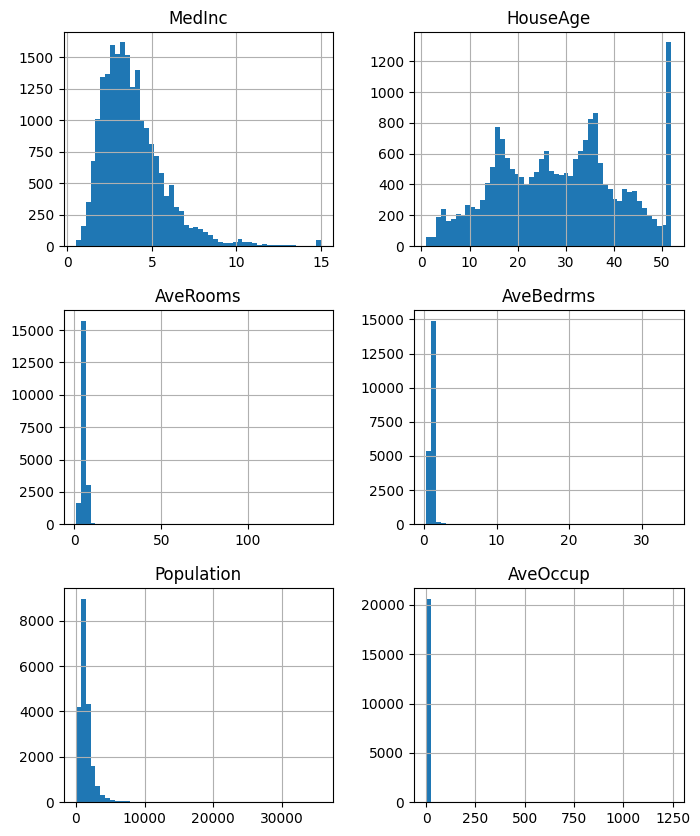

In [3]:
# Plot initial variable distributions:

X.hist(bins=50, figsize=(8, 10))
plt.show()

In [4]:
# To train and evaluate a model, let's first split the data into
# train and test data:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 6), (6192, 6), (14448,), (6192,))

In [5]:
# Let's scale the features.
# This is a normal procedure for linear models.
# I will explain this later in the course.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
# Let's train a linear model.

# Instantiate a linear model.
linreg = LinearRegression()

# Train the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 0.5987894249515695
Test set
Linear Regression mse: 0.652534450500461



In [7]:
# Calculate the residuals.

error = y_test - pred

<Axes: xlabel='MedHouseVal', ylabel='Count'>

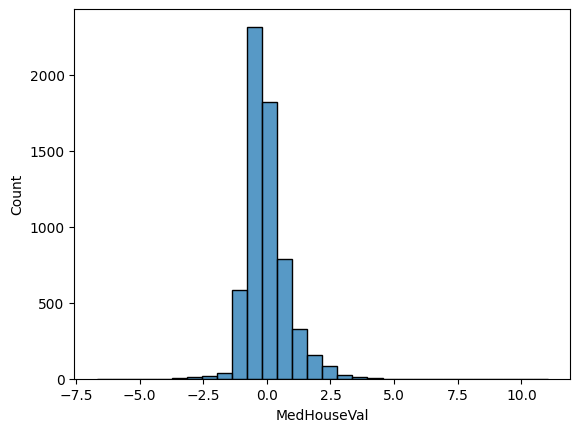

In [8]:
# We make a histogram to see if the residuals
# are normally distributed with mean value at 0.

sns.histplot(error, bins=30)

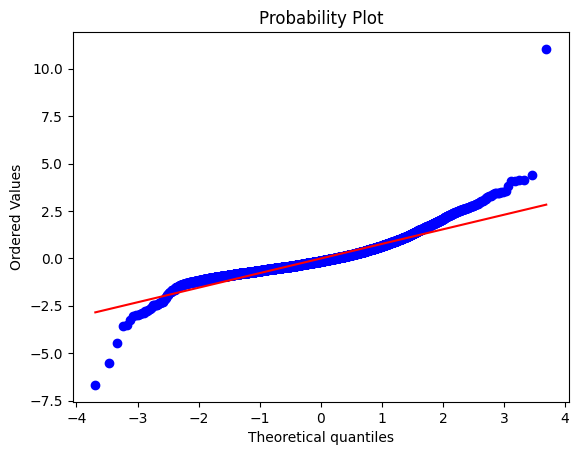

In [9]:
# We can also analyse the residuals distribution with
# Q-Q plots. If the residuals are normally distributed
# the dots should adjust to the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()

In [10]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')

Text(0, 0.5, 'Residuals')

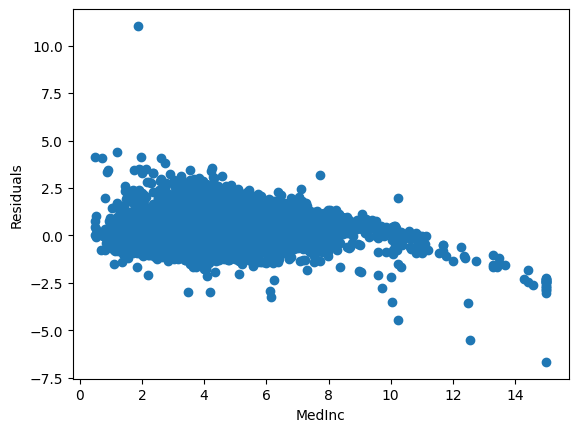

In [11]:
# Plot the residuals vs. one of the independent
# variables, MedInc (median income) in this case.

plt.scatter(x=X_test['MedInc'], y=error)
plt.xlabel('MedInc')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

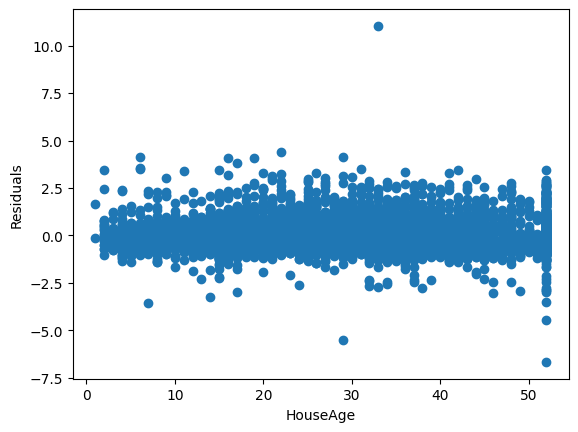

In [12]:
# Let's plot the residuals vs. HouseAge.

plt.scatter(x=X_test['HouseAge'], y=error)
plt.xlabel('HouseAge')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

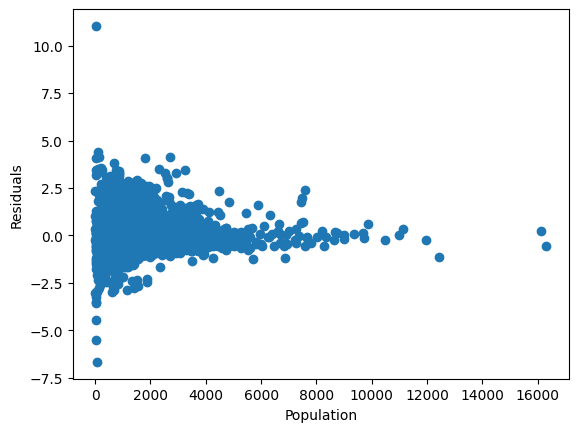

In [13]:
# Plot the residuals vs. one of the independent
# variables, Population in this case.

plt.scatter(x=X_test['Population'], y=error)
plt.xlabel('Population')
plt.ylabel('Residuals')

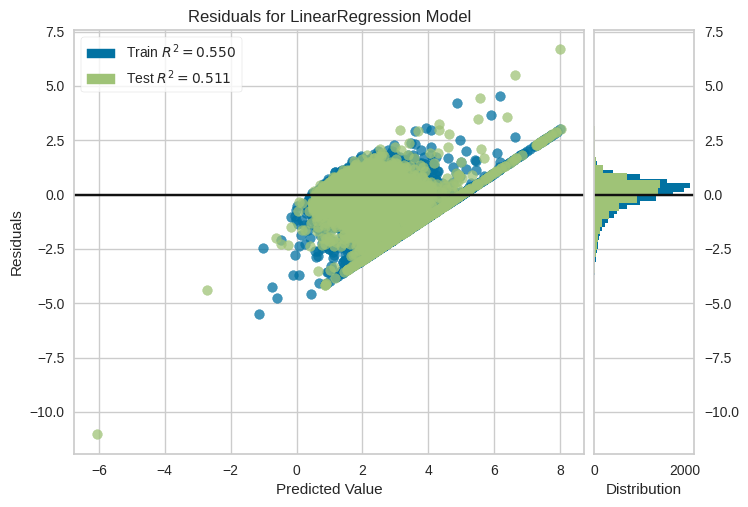

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
# I want to introduce Yellobrick,
# a library for visualisation of machine learning model
# performance.

# if you don't have yellowbricks installed, comment out
# this cell to avoid errors while running the notebook.

# Yellowbrick allows you to visualise the residuals of the
# models after fitting a linear regression.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

In [15]:
# Apply the box-cox transfoPopulationation to the variables.

X['MedInc'] = np.log(X['MedInc'])
X["AveRooms"] = 1 / X["AveRooms"]
X["AveBedrms"] = 1 / X["AveBedrms"]
X["AveOccup"] = 1 / X["AveOccup"]
X['Population'] = np.log(X['Population'])

# Let's separate the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 6), (6192, 6), (14448,), (6192,))

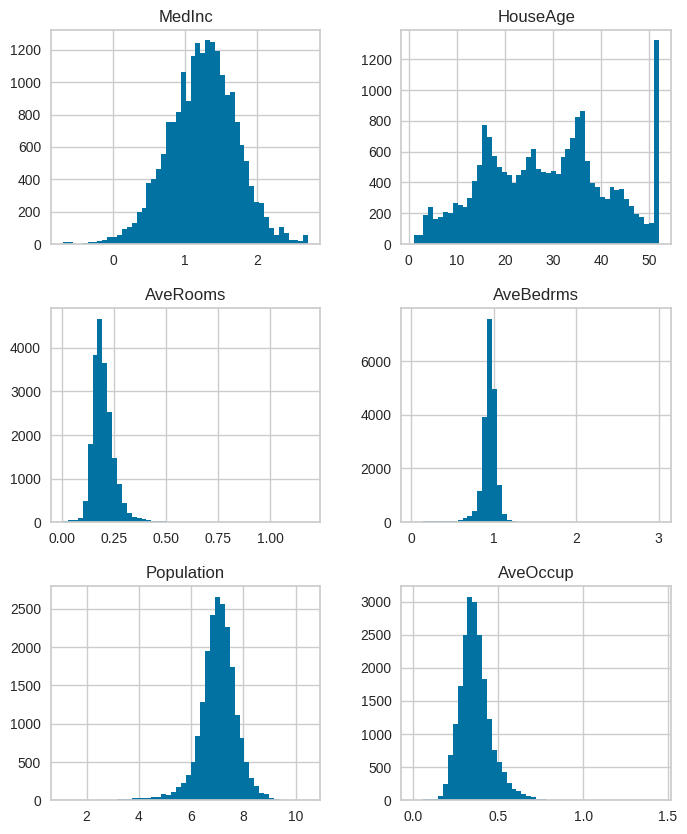

In [16]:
# Plot distributions after transformation
# (see that values are more evenly distributed)

X.hist(bins=50, figsize=(8,10))
plt.show()

In [17]:
# Let's scale the features.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
# Model trained with the transformed variables.

# The model.
linreg = LinearRegression()

# Fit the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions and calculate the mean squared
# error over the train set.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions and calculate the mean squared
# error over the test set.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 0.5827343807084003
Test set
Linear Regression mse: 0.5885761677910881



In [19]:
# Calculate the residuals.

error = y_test - pred

<Axes: xlabel='MedHouseVal', ylabel='Count'>

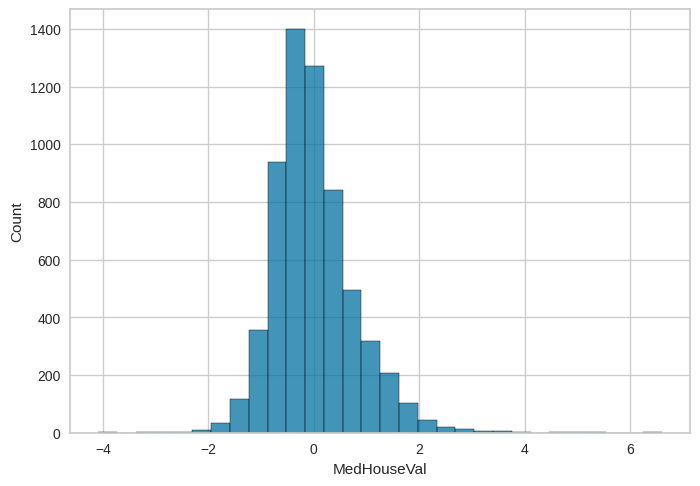

In [20]:
# We make a histogram to analyse the residuals'
# distribution.

sns.histplot(error, bins=30)

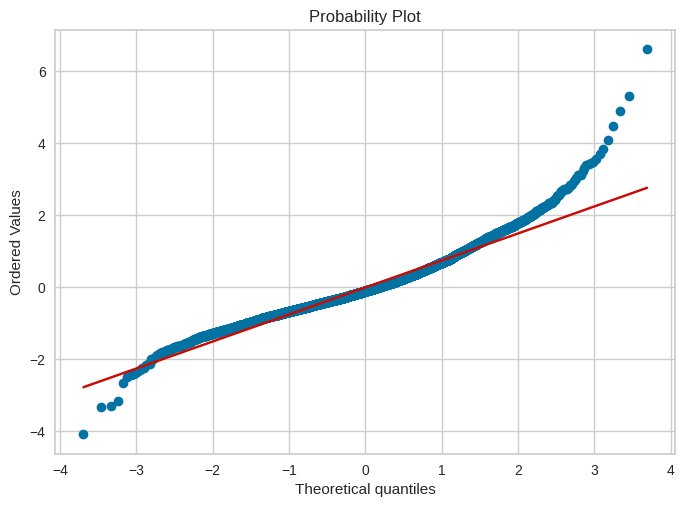

In [21]:
# We can also analise the residuals distribution with
# a Q-Q plot. If the residuals are normally distributed
# the dots should follow the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()

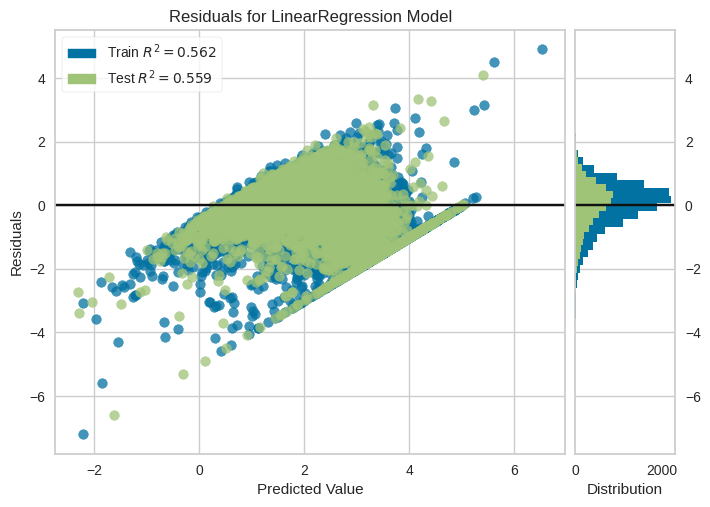

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
# Let's now do the analysis with yellowbrick.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

In [23]:
# I will create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y.

# This will provide the expected plots
# i.e., how the plots should look like if the
# assumptions are met.

np.random.seed(29) # for reproducibility

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


Text(0.5, 31.999999999999986, 'Independent variable')

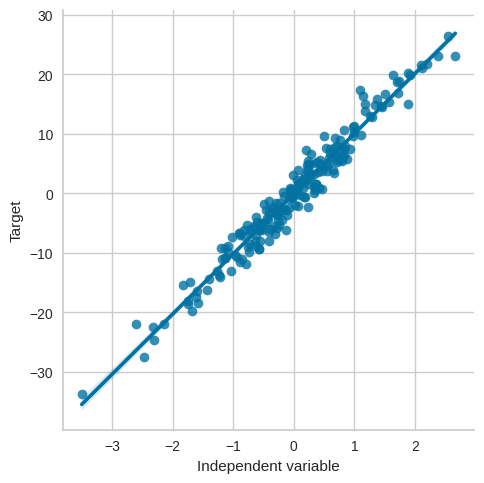

In [24]:
# With the toy data

# This is how the plot looks like when
# there is a linear relationship.

sns.lmplot(x="x", y="y", data=toy_df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y.

plt.ylabel('Target')
plt.xlabel('Independent variable')

In [25]:
len(X), len(y)

(20640, 200)

In [26]:
# Now let's use the California housing data set
# (remember that we transformed the variables already)

# add target to predictor dataframe
tmp = pd.concat([X, pd.Series(Y, name="price")], axis=1)

tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,price
0,2.119287,41.0,0.143182,0.976744,5.774552,0.391304,4.526
1,2.116424,21.0,0.160304,1.028933,7.783641,0.473969,3.585
2,1.982022,52.0,0.120654,0.931579,6.206576,0.356855,3.521
3,1.730434,52.0,0.171900,0.931915,6.324359,0.392473,3.413
4,1.347086,52.0,0.159189,0.925000,6.336826,0.458407,3.422


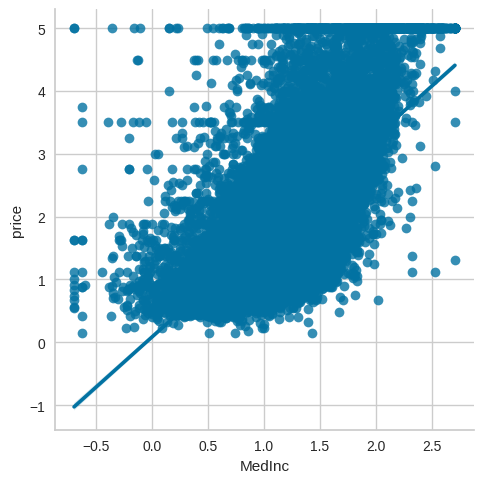

In [27]:
# plot
sns.lmplot(x="MedInc", y="price", data=tmp, order=1)

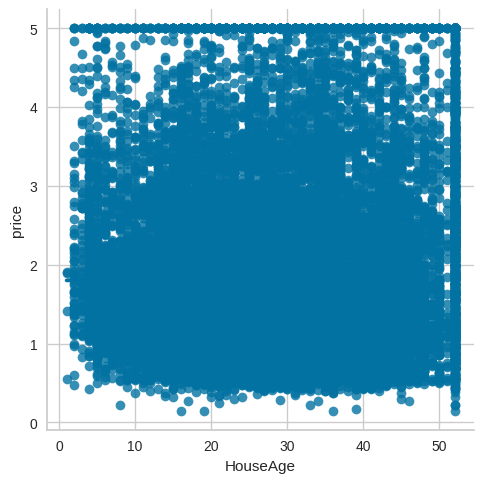

In [28]:
# Now we plot another variable

sns.lmplot(x="HouseAge", y="price", data=tmp, order=1)

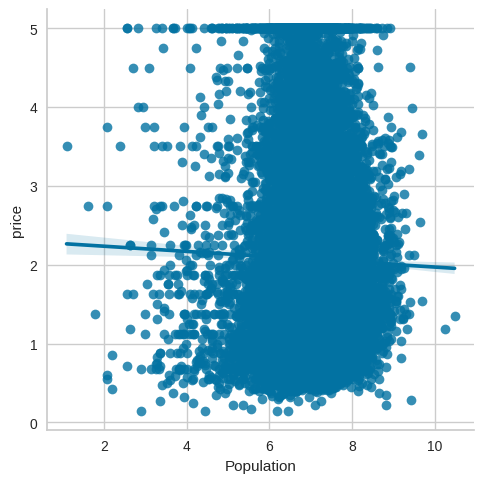

In [29]:
# Now we plot CRIM (per capita crime rate by town)
# vs. MEDV (median value of the house).

sns.lmplot(x="Population", y="price", data=tmp, order=1)

In [30]:
# Capture features in a list.

features = X_train.columns.to_list()

features

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

<Axes: >

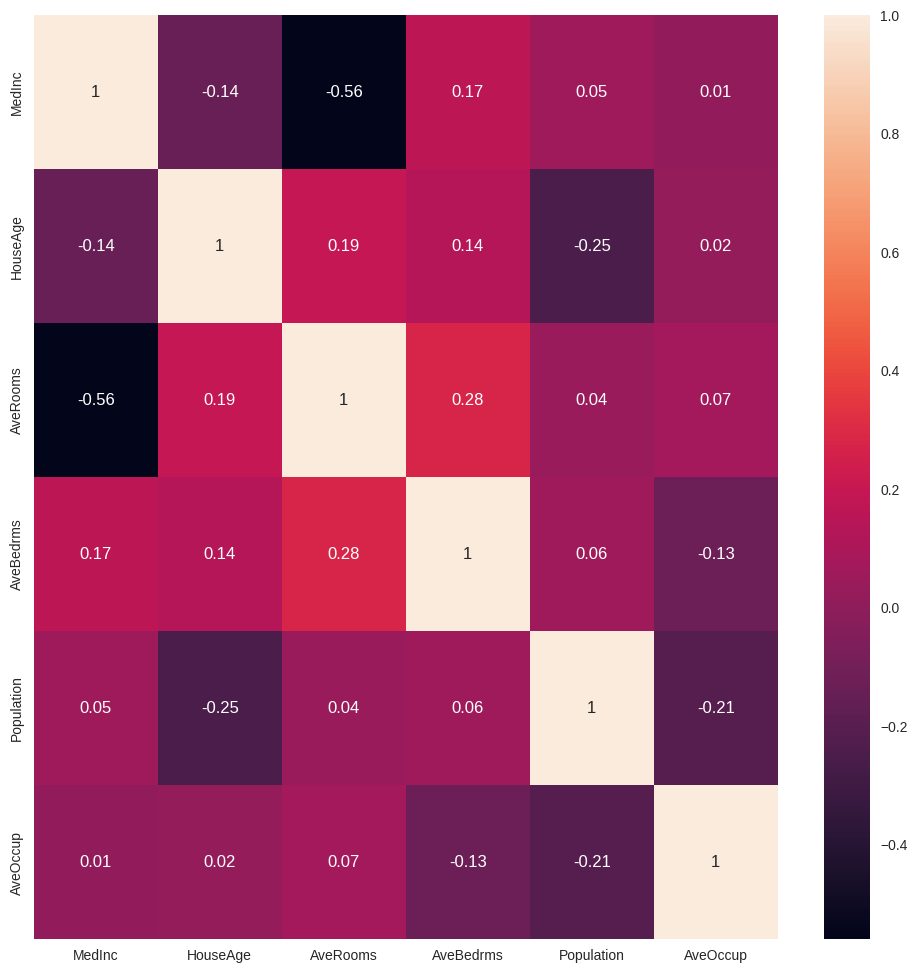

In [31]:
# We calculate the correlations using pandas corr()
# and we round the values to 2 decimals.
correlation_matrix = X_train.corr().round(2)

# Plot the correlation matrix usng seaborn.
# We use annot = True to print the correlation values
# inside the squares.

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)